In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

## а) навчить мережу з нуля (from scratch)

In [17]:
dataset_url = "https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)

In [18]:
data_dir = pathlib.Path(archive + "/Rice_Image_Dataset").with_suffix('')
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

75000


In [19]:
batch_size = 32
img_height = 25
img_width = 25

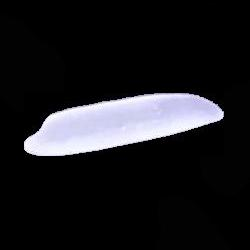

In [20]:
basmati = list(data_dir.glob('Basmati/*'))
PIL.Image.open(str(basmati[0]))

In [21]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

ds_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 75000 files belonging to 5 classes.
Using 45000 files for training.
Found 75000 files belonging to 5 classes.
Using 30000 files for validation.
Found 75000 files belonging to 5 classes.
Using 30000 files for validation.


2024-12-04 23:05:39.826062: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


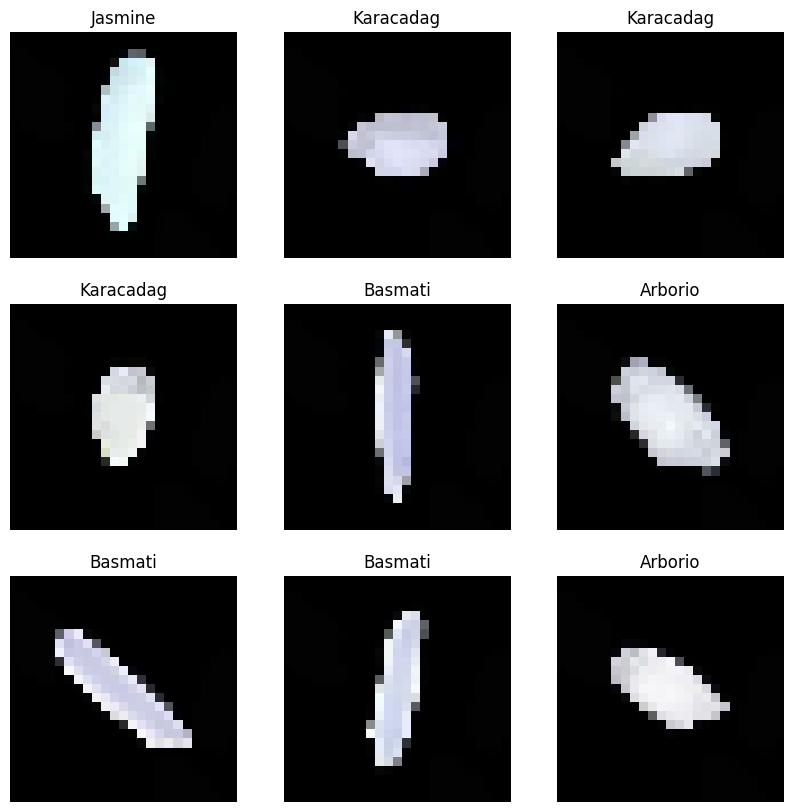

In [22]:
class_names = ds_train.class_names

num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 25, 25, 3)
(32,)


In [24]:
ds_train = ds_train.cache()
ds_val = ds_val.cache()

ds_train = ds_train.shuffle(buffer_size=1000)

In [25]:
model = tf.keras.Sequential([
	tf.keras.layers.Rescaling(1./25),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(32, 3, activation='relu'),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy'])


history = model.fit(
	ds_train,
	# steps_per_epoch=10,
	batch_size=batch_size,
	validation_data=ds_val,
	epochs=20,
	verbose = 1
)

Epoch 1/20


/home/anna/Documents/Cur-Lec/Data-analysis-2024/Data-Analysis/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8789 - loss: 0.3112 - val_accuracy: 0.9622 - val_loss: 0.1093
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9688 - loss: 0.0902 - val_accuracy: 0.9623 - val_loss: 0.1056
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9761 - loss: 0.0691 - val_accuracy: 0.9845 - val_loss: 0.0474
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9796 - loss: 0.0588 - val_accuracy: 0.9763 - val_loss: 0.0696
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9835 - loss: 0.0498 - val_accuracy: 0.9700 - val_loss: 0.0920
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9854 - loss: 0.0439 - val_accuracy: 0.9899 - val_loss: 0.0323
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9864 - loss: 0.0414 - val_accuracy: 0.9873 - val_loss: 0.0390
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.9893 - loss: 0.03

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

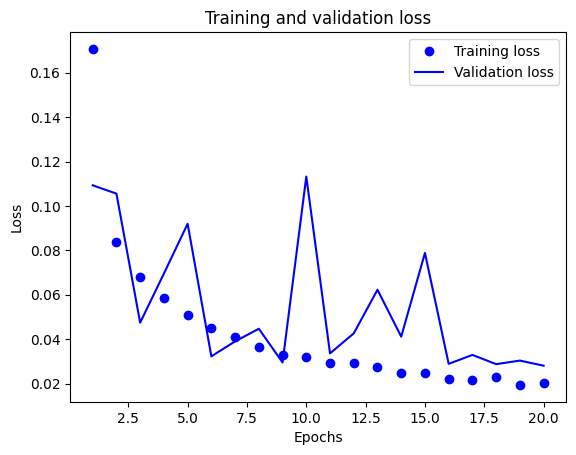

In [27]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
score = model.evaluate(ds_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.02805378846824169
Test accuracy: 0.9919666647911072
